# 1주차 2차시

In [1]:
import pandas as pd
df = pd.read_excel('C:\\대학수업\\2022.1학기\\파이썬을이용한데이터분석\\data\\data.xlsx')
df.head(3)

,일자,KT,SK텔레콤,현대모비스
0,2016/01/04,28000,210500,238000
1,2016/01/05,28200,210000,237000
2,2016/01/06,28100,208000,234500


In [2]:
df.set_index('일자',inplace=True)    # 임의로 생성된 인덱스를 '일자'인덱스로 변경후 저장
df.head(3)

,KT,SK텔레콤,현대모비스
일자,,,
2016/01/04,28000,210500,238000
2016/01/05,28200,210000,237000
2016/01/06,28100,208000,234500


<AxesSubplot:xlabel='일자'>

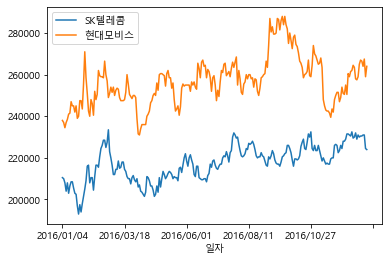

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'    # 윈도우시
# matplotlib.rcParams['font.family'] = 'AppleGothic'    # 맥일시
matplotlib.rcParams['font.size'] = 10                   # 폰트 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False       # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결

df.plot(y=['SK텔레콤','현대모비스'])

In [4]:
df['KT_MovingAverage'] = df['KT'].rolling(5).mean()
df.head(6)

,KT,SK텔레콤,현대모비스,KT_MovingAverage
일자,,,,
2016/01/04,28000,210500,238000,NaN
2016/01/05,28200,210000,237000,NaN
2016/01/06,28100,208000,234500,NaN
2016/01/07,27750,204000,237000,NaN
2016/01/08,27750,208000,238500,27960.0
2016/01/11,27600,203000,241000,27880.0


<AxesSubplot:title={'center':'KT and KT moving average'}, xlabel='일자'>

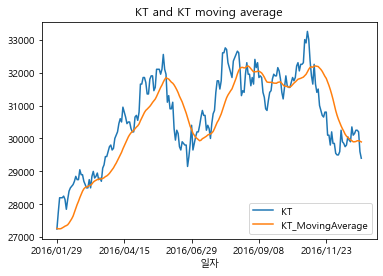

In [5]:
df['KT_MovingAverage'] = df['KT'].rolling(20).mean()
df.dropna(axis=0,inplace=True)  # 결측치 값의 행을 제거   axis = 0 --> ㅡ   axis = 1 --> |
df[['KT','KT_MovingAverage']].plot(title='KT and KT moving average',legend=True)

# 주가 API 다운로드

In [6]:
import yfinance as yf
SKT = yf.download('017670.KS','2020-11-01','2020-11-13')
SKT

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,70797.976562,72115.148438,70139.390625,70797.976562,65345.433594,886481
2020-11-03,71291.914062,72444.437500,70962.625000,72115.148438,66561.171875,1203909
2020-11-04,73103.023438,73432.320312,71950.500000,71950.500000,66409.195312,916014
2020-11-05,72773.734375,73761.609375,72444.437500,73432.320312,67776.898438,1243200
2020-11-06,73926.257812,75243.429688,73761.609375,74749.492188,68992.632812,1082203
2020-11-09,75078.781250,75408.078125,73926.257812,74255.554688,68536.726562,1016982
2020-11-10,74255.554688,75078.781250,73103.023438,74749.492188,68992.632812,1474775
2020-11-11,74090.906250,76395.953125,74090.906250,75902.015625,70056.382812,1074575
2020-11-12,76066.664062,76395.953125,75078.781250,75737.367188,69904.421875,940585


# Pandas 시계열 수치자료의 증감률계산

In [2]:
import pandas as pd
import yfinance as yf
data = yf.download('005380.KS','2010-01-04','2019-01-05')
return_series = data['Close'].pct_change()
return_series


[*********************100%***********************]  1 of 1 completed


Date
2010-01-04         NaN
2010-01-05   -0.075630
2010-01-06    0.009091
2010-01-07   -0.045045
2010-01-08    0.000000
                ...   
2018-12-27   -0.012500
2018-12-28    0.000000
2019-01-02   -0.037975
2019-01-03    0.021930
2019-01-04    0.025751
Name: Close, Length: 2222, dtype: float64

In [3]:
import pandas as pd
import yfinance as yf
data = yf.download('005380.KS','2010-01-04','2019-01-05')
data['Close_return'] = data['Close'].pct_change()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Close_return
Date,,,,,,,
2010-01-04,119500.0,120500.0,118000.0,119000.0,93868.914062,1602697,NaN
2010-01-05,118000.0,119000.0,110000.0,110000.0,86769.578125,3045198,-0.075630
2010-01-06,111000.0,112500.0,108000.0,111000.0,87558.398438,1681152,0.009091
2010-01-07,111000.0,111500.0,105000.0,106000.0,83614.312500,1736811,-0.045045
2010-01-08,106000.0,107000.0,102500.0,106000.0,83614.312500,2175189,0.000000


[*********************100%***********************]  1 of 1 completed


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Hmotors daily returns between 2010-01-04 and 2019-01-05')

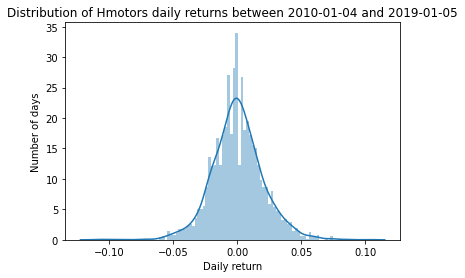

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
stock = 'Hmotors'
code = '005380.KS'
start = '2010-01-04'
end = '2019-01-05'

data=yf.download(code,start,end)
data['Close_return'] = data['Close'].pct_change()
data.dropna(axis=0,inplace=True)
sns.distplot(data['Close_return'],bins = 100)
plt.xlabel('Daily return')
plt.ylabel('Number of days')
plt.title('Distribution of '+stock+' daily returns between ' +start+' and '+end)